In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import & Explore Data

In [20]:
df = pd.read_csv('medical_examination.csv')
print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int32  
 8   gluc         70000 non-null  int32  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int32(2), int64(11)
memory usage: 6.9 MB


In [60]:
print(df.describe())

                 id           age           sex        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      0.251643      0.150300      0.088129   
std      154.011419    188.472530      0.433960    

# Clean & Format Data

In [21]:
# Create Column for Overweight Variable

def calc_overweight(height_cm, weight_kg):
    """
    Calculates the weight status based on BMI.

    Args:
    height_cm (float) - Height in cm
    weight_kg (float) - Weight in kg

    Returns:
    int: 1 if overweight, otherwise 0
    """
    height_m = height_cm / 100
    bmi = weight_kg / (height_m ** 2)
    # Return 1 if True , 0 if False
    return int(bmi > 25)  


df['overweight'] = df.apply(lambda row: calc_overweight(row['height'],row['weight']), axis=1)

In [23]:
# Normalize Cholesterol and Glucose Columns
# Replace 1's with 0's and values >1 with a 1

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

df['gluc'] = (df['gluc'] > 1).astype(int)

# Visualize Data

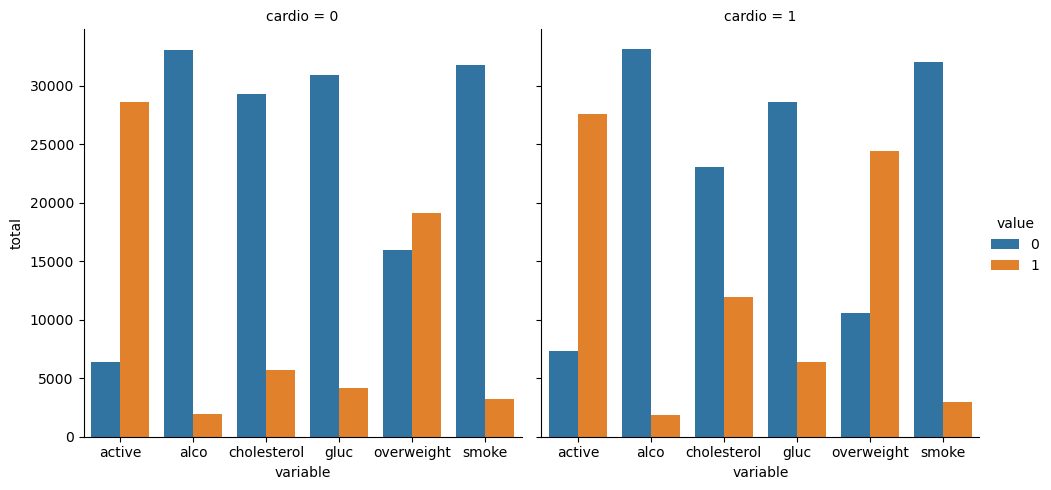

In [49]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_filtered = df[['cholesterol','gluc','smoke','alco','active','overweight','cardio']]
    df_cat = pd.melt(df_filtered, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], id_vars='cardio', var_name='variable', value_name='value')

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['variable', 'value', 'cardio']).size().reset_index(name='total')

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

    # Get the figure for the output
    fig = g.figure

    # Do not modify the next two lines
    fig.savefig('catplot.png')

draw_cat_plot()

In [63]:
# Remove Outliers
bp_bool = df['ap_lo'] <= df['ap_hi']
short_bool = df['height'] >= df['height'].quantile(0.025)
tall_bool = df['height'] <= df['height'].quantile(0.975)
uw_bool = df['weight']  >= df['weight'].quantile(.025)
ow_bool = df['weight'] <= df['weight'].quantile(.975)

df_heat = df[bp_bool & short_bool & tall_bool & uw_bool & ow_bool]
df_heat.corr()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [64]:
# Draw Heat Map
def draw_heat_map():
    # Remove Outliers
    bp_bool = df['ap_lo'] <= df['ap_hi']
    short_bool = df['height'] >= df['height'].quantile(0.025)
    tall_bool = df['height'] <= df['height'].quantile(0.975)
    uw_bool = df['weight']  >= df['weight'].quantile(.025)
    ow_bool = df['weight'] <= df['weight'].quantile(.975)

    df_heat = df[bp_bool & short_bool & tall_bool & uw_bool & ow_bool]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11,9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', center=0,\
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


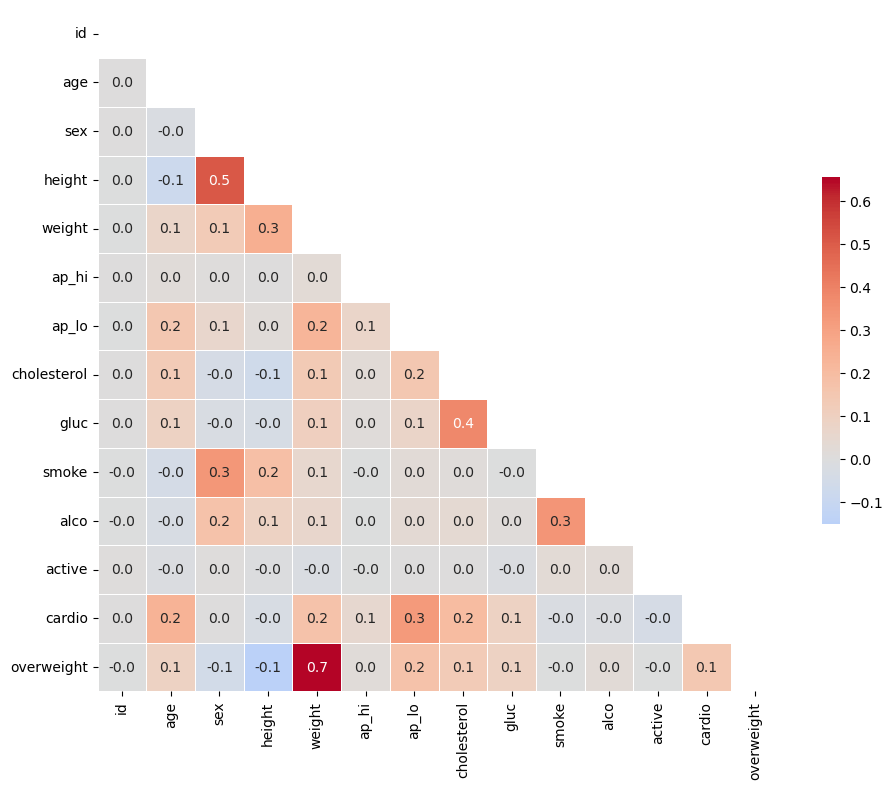

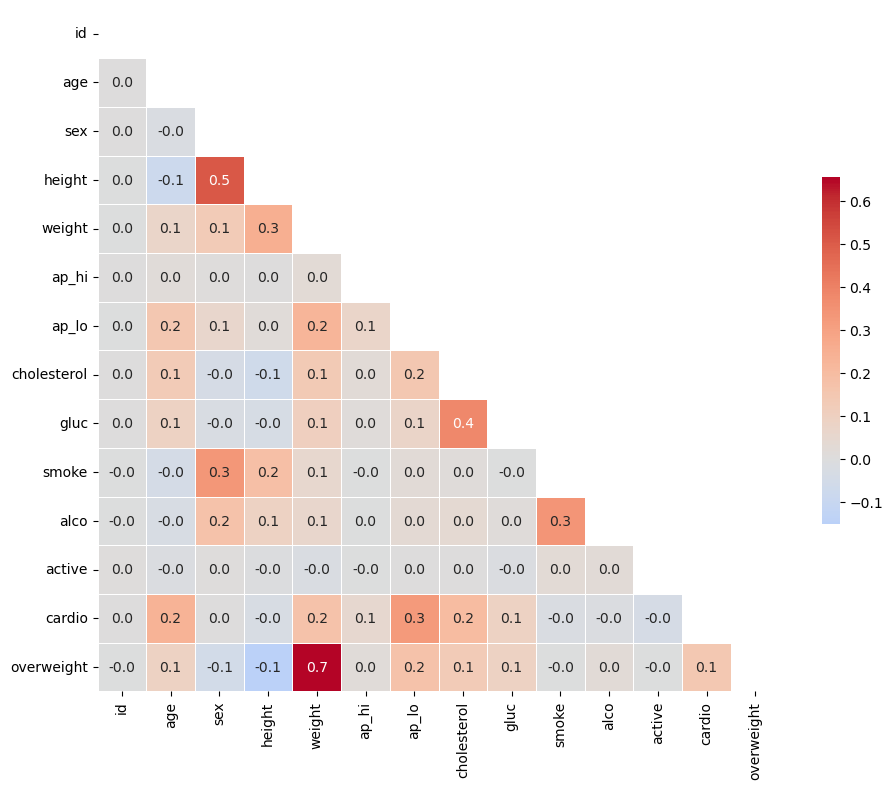

In [65]:
draw_heat_map()